MainProcess


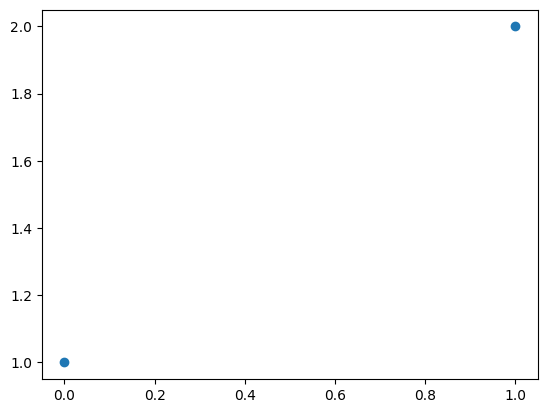

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/flagellar/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
model = fls.dill_load(fls.temp_dir + 'model_3.pickle')
data = fls.dill_load(fls.temp_dir + 'data_3.pickle')
data = data[30:]
to_remove = []
for i_d in range(len(data)):
    pass
    #if 'tom' in data[i_d].name:
    #    to_remove.append(i_d)
for i_d in list(reversed(to_remove)):
    del data[i_d]
#data = data[0:1]
        
ref_data = []
all_data = fls.load_all_train_data() + fls.load_all_extra_data()
for d in data:
    for r in all_data:
        if d.name == r.name:
            ref_data.append(r)

[    0.50119      0.5131      0.5253     0.53779     0.55057     0.56366     0.57706     0.59078     0.60483     0.61921     0.63393       0.649     0.66443     0.68023      0.6964     0.71295      0.7299     0.74726     0.76502     0.78321     0.80183     0.82089     0.84041     0.86039     0.88084     0.90178
     0.92322     0.94517     0.96764     0.99065      1.0142      1.0383       1.063      1.0883      1.1141      1.1406      1.1677      1.1955      1.2239       1.253      1.2828      1.3133      1.3445      1.3765      1.4092      1.4427       1.477      1.5121      1.5481      1.5849]


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs


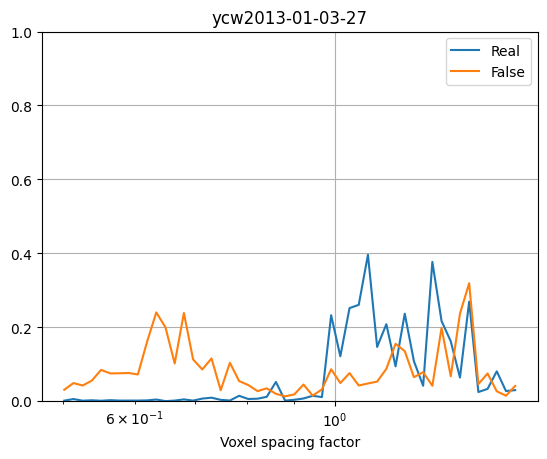

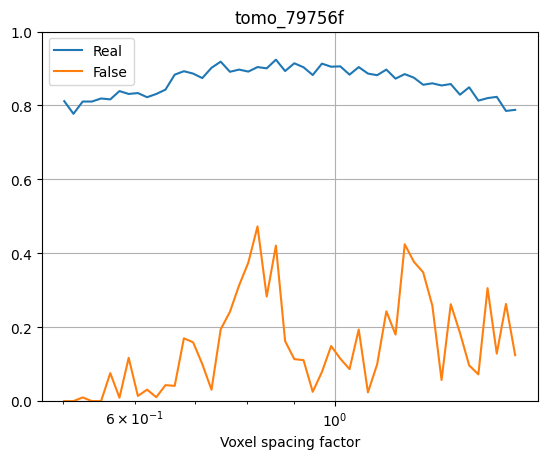

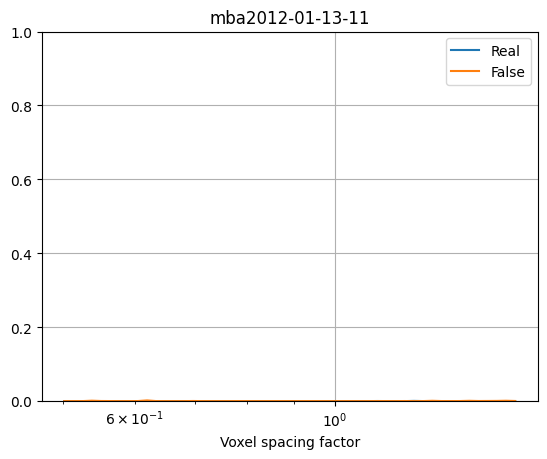

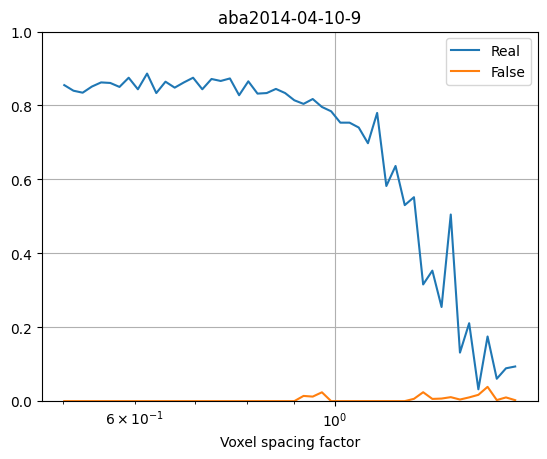

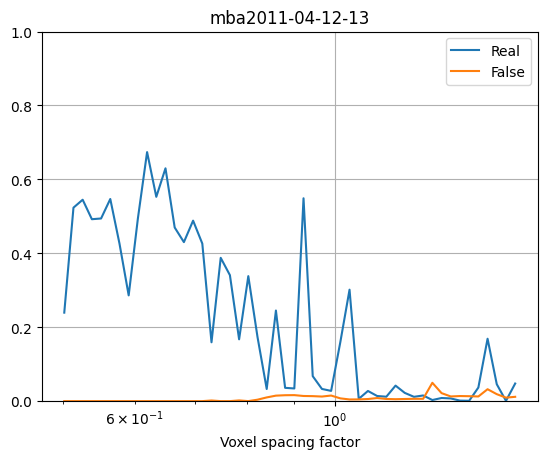

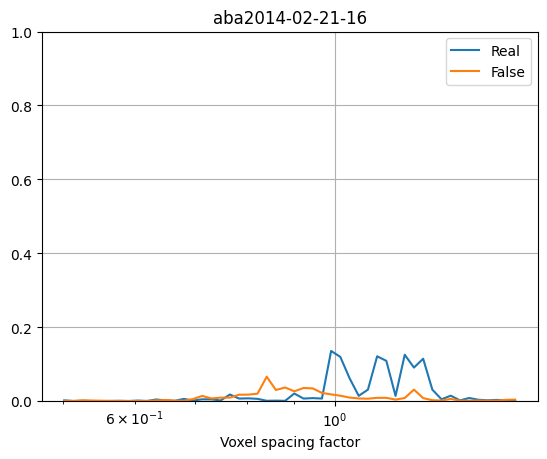

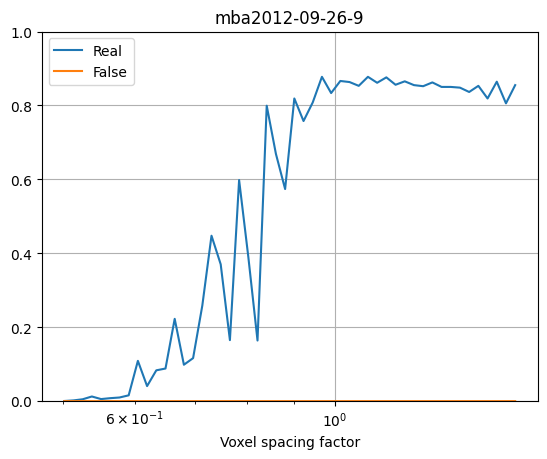

In [ ]:
import io
import contextlib
voxel_spacing_vals = np.logspace(-0.3,0.2,50)
print(voxel_spacing_vals)
real_score = np.zeros((len(voxel_spacing_vals), len(data)))
false_score = np.zeros((len(voxel_spacing_vals), len(data)))
for i_d in range(len(data)):
    for i_v in range(len(voxel_spacing_vals)):    
        with contextlib.redirect_stdout(io.StringIO()) as f:
            d = copy.deepcopy(data[i_d])
            d.voxel_spacing *= voxel_spacing_vals[i_v]        
            d = model.infer([d])[0]
            d.labels_unfiltered = d.labels_unfiltered2
            fls.mark_tf_pn([d], ref_data[i_d:i_d+1])
            tp = d.labels_unfiltered[d.labels_unfiltered['tf_pn']==0.]
            if len(tp>0):
                real_score[i_v,i_d] = np.max(tp['confidence'])
            else:
                real_score[i_v,i_d] = 0.
            fp = d.labels_unfiltered[d.labels_unfiltered['tf_pn']==1.]
            if len(fp>0):
                false_score[i_v,i_d] = np.max(fp['confidence'])
            else:
                false_score[i_v,i_d] = 0.

    plt.figure()
    plt.semilogx(voxel_spacing_vals, real_score[:,i_d])
    plt.semilogx(voxel_spacing_vals, false_score[:,i_d])
    plt.xlabel('Voxel spacing factor')
    plt.legend(('Real', 'False'))
    plt.ylim([0,1])
    plt.grid(True)    
    plt.title(data[i_d].name)
    plt.pause(0.001)

plt.figure()
plt.semilogx(voxel_spacing_vals, real_score)
plt.xlabel('Voxel spacing factor')
plt.ylabel('Real score')
plt.grid(True)

plt.figure()
plt.semilogx(voxel_spacing_vals, false_score)
plt.xlabel('Voxel spacing factor')
plt.ylabel('False score')
plt.grid(True)

In [ ]:
# import flg_model
# importlib.reload(flg_model)
# model2 = flg_model.TestTimeAugmentation()
# model2.voxel_spacing_scale_vals = list(voxel_spacing_vals)
# model2.model_internal = model
# model2.train([], [])
# model2.infer(data)